In [1]:
# Jupyter notebook sets the cwd to the folder containing the notebook.
# So, you want to add the root of the project to the sys path, so modules load correctly.
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("../../")

# Monte Carlo Simulation

Mostly based on YouTube video: https://youtu.be/slbZ-SLpIgg?si=JEZA-BJsM8vEuD4b

From lecture slides:

* Identify input parameters and distributions based on realistic estimates
* Sample from random distribution
* Compute output result
* Repeat X number of times from step 2
* Analyze output variable, e.g. mean, std-dev, probability of success?
* Repeat whole experiment Y times to get confidence in intervals.

# 1. Create Model.

Convert "We want 2 reports by end of day" into some kind of model, with an appropriate distribution. As per the video, we are going to model the time taken to write a report by a uniform distribution. So, time to complete the reports A and B is equiprobable between the low and high limits. 

In [3]:
A = np.random.uniform(low=1.0, high=5.0, size=1)
B = np.random.uniform(low=2.0, high=6.0, size=1)
duration = A + B
print(f"One sample is A={A}, B={B}, duration={duration}")

One sample is A=[1.20318001], B=[4.14157275], duration=[5.34475276]


If you re-reun the above cell, you will get a different number each time you run it.

# 2. Sample from Distribution X Times, Compute Output.

Depending on your programming style, you can for example

* Use a for loop, to sample each number, and compute model inside loop.
* Or use array arithmetic, which should be slightly faster.
* (or some other programming style)

In [18]:
# This variable controls the number of samples.
sims = 100000

In [19]:
# Option 1: Using for loop. Slow, but might be easier to follow.
duration_samples = []
for i in range(0, sims):
    A_sample = np.random.uniform(low=1.0, high=5.0, size=1)
    B_sample = np.random.uniform(low=2.0, high=6.0, size=1)
    duration_sample = A_sample + B_sample
    duration_samples.append(duration_sample)

print(f"Using loop: mean={np.mean(duration_samples)}, std_dev={np.std(duration_samples)}")

Using loop: mean=7.006858796296506, std_dev=1.6331296049564739


In [20]:
# Option 2: Using arrays. Faster, but depending on the complexity of model, may be confusing.
A_samples = np.random.uniform(low=1.0, high=5.0, size=sims)
B_samples = np.random.uniform(low=2.0, high=6.0, size=sims)
duration_samples = A_samples + B_samples
print(f"Using arrays: mean={np.mean(duration_samples)}, std_dev={np.std(duration_samples)}")

Using arrays: mean=7.003426575973205, std_dev=1.6323965084354124


# Analyse Output.

This does depend on the specific problem you are studying. You could compute 

* some summary statistics, e,g. mean, standard deviation of total time taken.
* probability of total time being too much (in this case, being late for the party. i.e. total time > 9 hours.)

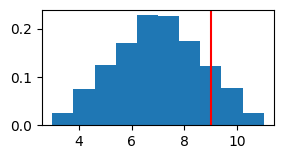

Probability of going over 9 hours:0.12569


In [21]:
plt.figure(figsize=(3, 1.5))
plt.hist(duration_samples, density=True)
plt.axvline(9, color='r')
plt.show()
print(f"Probability of going over 9 hours:{(duration_samples > 9).sum() / sims}")

# Confidence Limits.

Imagine the scenario above was done with only 1, 2, or say 10 samples for the length of each report? Would it be a good thing to reply on the probability derived. It may be the case that the small number of samples, say 1, 2, or 10, gave exactly the right answer. But it may also be the case that we just got lucky/unlucky with the data, and we predict say 12.5 %, when in reality the unknown true value is different. What we want is a measure of certainty or "confidence" in the prediction. We want to be able to say, "The expected total time is X, and I'm Y (say 95%) confident that my estimate lies within a range A-B".

# Confidence Intervals by Empirical Rule

While this is simple, it is in general wrong. If we don't actually know the output distribution, it's technically wrong to assume it is Gaussian. In the general case, we would have to model the whole system and compute the mean and variance based on combining all the random variables together correctly. If we could do this, we would not need Monte Carlo simulation in the first place. Note however that it may, in simple cases like this, still produce convincing numbers. See the "Confidence Intervals by Simulation" method, which is data-driven, and makes no assumptions on the distributions, or independence of variables.

In [22]:
# Method 1: Assuming normally distributed output value (duration of time in this case). Use "Empirical Rule"

# i.e. You hard code the rule from standard lookup tables:
# 68% of data within 1.0 std dev.
# 95% of data within 1.96 std dev.
# 99.7% of data within 3 std dev.

mean_of_total_times = np.mean(duration_samples)
std_dev_of_total_times = np.std(duration_samples)
low = np.round(mean_of_total_times - 1.96 * std_dev_of_total_times, 2)
high = np.round(mean_of_total_times + 1.96 * std_dev_of_total_times, 2)

print(f"Expected total time is {np.round(mean_of_total_times,2)}, and I'm 95% confident that the total time will lie within {low} and {high} hours.")


Expected total time is 7.0, and I'm 95% confident that the total time will lie within 3.8 and 10.2 hours.


# Confidence Intervals by Simulation

A simple way to compute 95% confidence intervals is to simply take the central 95% of the data. This makes no assumptions about the output distribution, or the independence of contributory random variables.

In [20]:
low = np.round(np.percentile(duration_samples, 2.5), 2)
high = np.round(np.percentile(duration_samples, 97.5), 2)
mean_of_means = np.round(np.mean(duration_samples), 2)
print(f"Expected total time is {mean_of_means}, and I'm 95% confident that the total time will lie within {low} and {high} hours.")

Expected total time is 7.0, and I'm 95% confident that the total time will lie within 3.9 and 10.11 hours.
